In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels= []
train_samples =[]

In [ ]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #fit transform doesnt accept 1d data thats why reshape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
models = Sequential([
    Dense(units = 16, input_shape = (1,), activation='relu' ),
    Dense(units = 32, activation='relu' ),
    Dense(units = 2, activation='softmax' )
    #3 hidden layers basically
])

In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
models.compile(optimizer=Adam(learning_rate=0.001), loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'])
models.fit(x= scaler_train_samples, y = train_labels,  validation_split = 0.1, batch_size=10,epochs=30, shuffle=True, verbose=2)

In [ ]:
test_labels= []
test_samples =[]

In [ ]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1,1)) #fit transform doesnt accept 1d data thats why reshape

In [ ]:
predictions = models.predict(x= scaler_test_samples , batch_size=10, verbose=0)

In [ ]:
for i in predictions:
    print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)

In [ ]:
for i in rounded_predictions:
    print(i)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions )

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


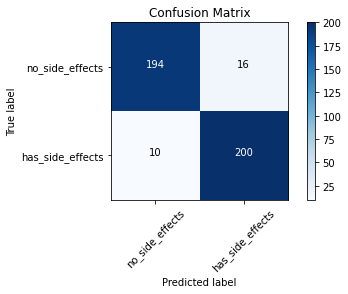

In [ ]:
cm_plot_labels = ['no_side_effects', 'has_side_effects']
plot_confusion_matrix (cm=cm, classes = cm_plot_labels, title='Confusion Matrix')